In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
insurance = pd.read_csv('/home/adam/Projekt_Ub_Reg/Estimating-insurance-cost/Data/insurances.csv')

In [4]:
insurance.head()

,wiek,plec,bmi,dzieci,palacz,region,kwota
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [19]:
unique_values = insurance['region'].unique()
print(unique_values)

['southwest' 'southeast' 'northwest' 'northeast']


In [5]:
insurance.describe(include='all')

,wiek,plec,bmi,dzieci,palacz,region,kwota
count,1338.000000,1338,1338.000000,1338.000000,1338,1338,1338.000000
unique,NaN,2,NaN,NaN,2,4,NaN
top,NaN,male,NaN,NaN,no,southeast,NaN
freq,NaN,676,NaN,NaN,1064,364,NaN
mean,39.207025,NaN,30.663397,1.094918,NaN,NaN,13270.422265
std,14.049960,NaN,6.098187,1.205493,NaN,NaN,12110.011237
min,18.000000,NaN,15.960000,0.000000,NaN,NaN,1121.873900
25%,27.000000,NaN,26.296250,0.000000,NaN,NaN,4740.287150
50%,39.000000,NaN,30.400000,1.000000,NaN,NaN,9382.033000
75%,51.000000,NaN,34.693750,2.000000,NaN,NaN,16639.912515


In [11]:
insurance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   wiek    1338 non-null   int64  
 1   plec    1338 non-null   object 
 2   bmi     1338 non-null   float64
 3   dzieci  1338 non-null   int64  
 4   palacz  1338 non-null   object 
 5   region  1338 non-null   object 
 6   kwota   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [21]:
temp_gender = {'female':0, 'male':1}
temp_smoking = {'no':0, 'yes':1}
temp_region = {'southwest': 0, 'southeast': 1, 'northwest':2, 'northeast':3}

insurance_temp = insurance.copy()

insurance_temp['plec_num'] = insurance['plec'].apply(lambda x: temp_gender[x])
insurance_temp['palacz_num'] = insurance['palacz'].apply(lambda x: temp_smoking[x])
insurance_temp['region_num'] = insurance['region'].apply(lambda x: temp_region[x])

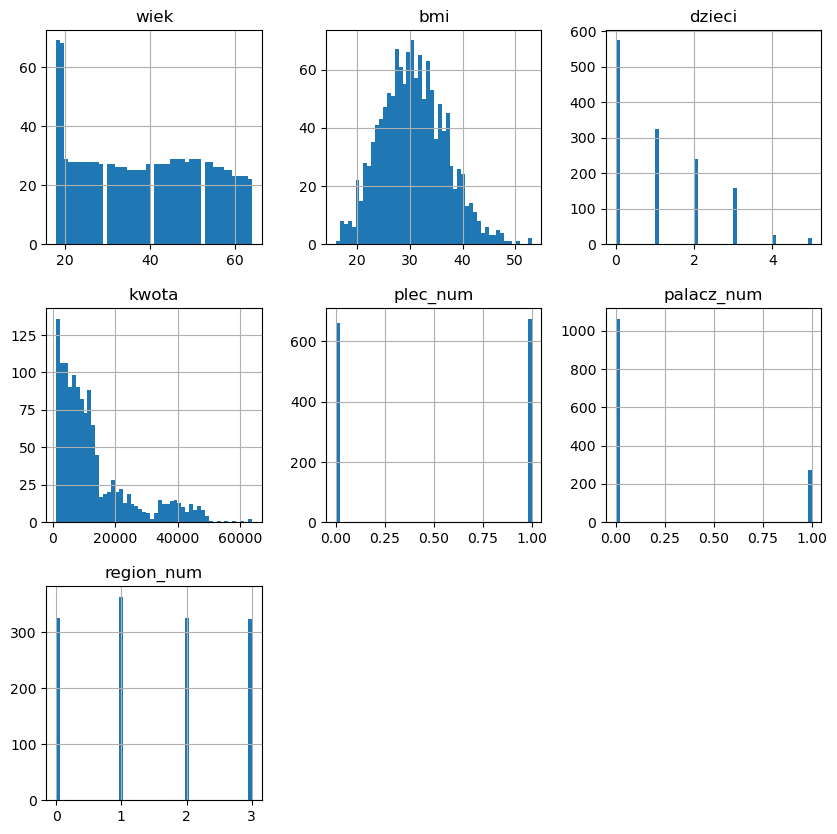

In [22]:
insurance_temp.hist(bins=50, figsize=(10,10));

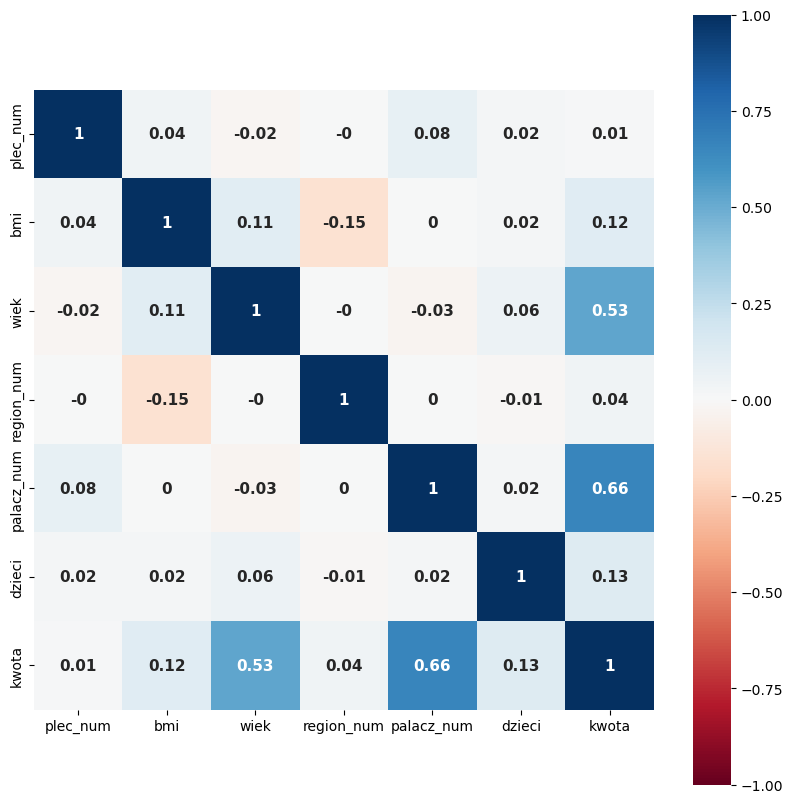

In [27]:
corr_matrix = insurance_temp[list(set(insurance_temp.columns) - {'plec', 'palacz', 'region'})].corr(method = 'spearman').round(2)
fig, ax = plt.subplots(figsize=(10, 10))
dataplot = sns.heatmap(corr_matrix, cmap='RdBu', vmin=-1, vmax=1, annot=True, square=True, annot_kws={'fontsize':11, 'fontweight':'bold'})
plt.show()

In [28]:
from pandas.plotting import scatter_matrix

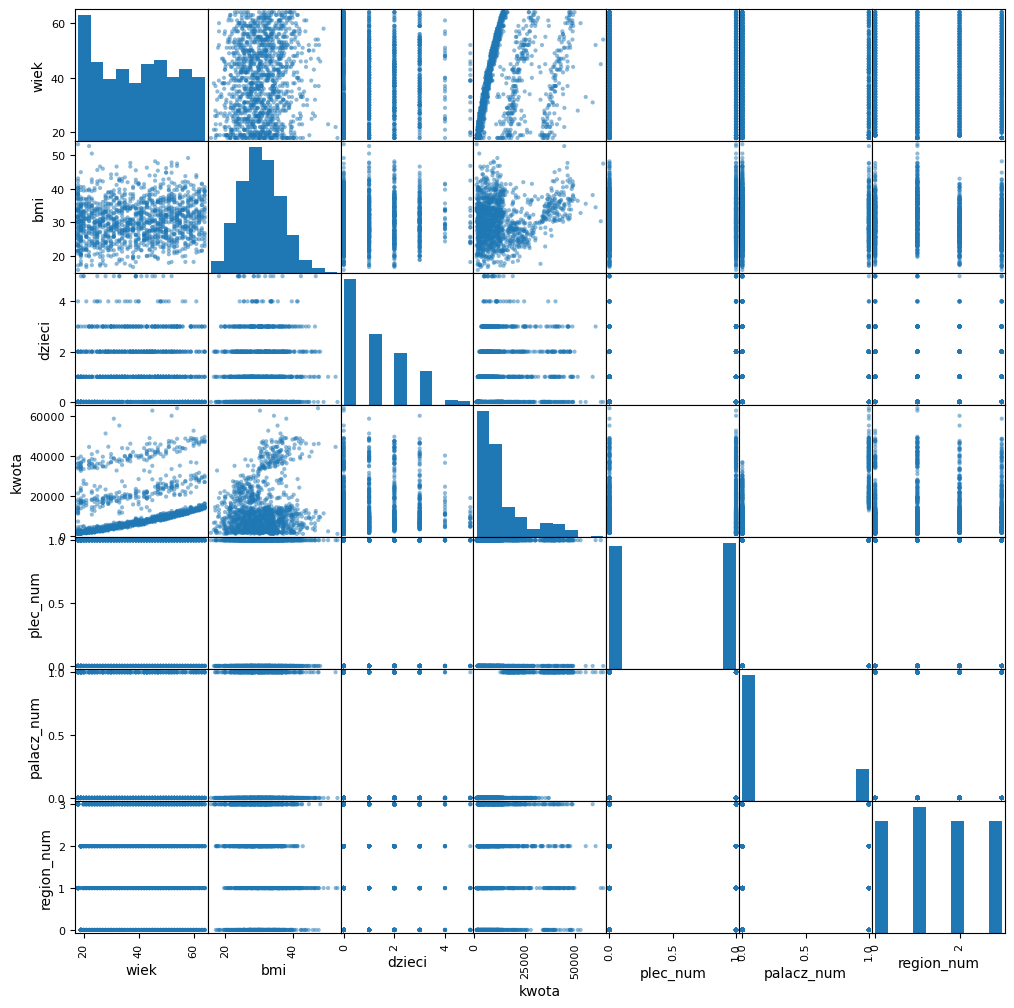

In [29]:
scatter_matrix(insurance_temp, figsize=(12,12));